<h2><a href="https://leetcode.com/problems/xor-queries-of-a-subarray">1310. XOR Queries of a Subarray</a></h2><h3>Medium</h3><hr><p>You are given an array <code>arr</code> of positive integers. You are also given the array <code>queries</code> where <code>queries[i] = [left<sub>i, </sub>right<sub>i</sub>]</code>.</p>

<p>For each query <code>i</code> compute the <strong>XOR</strong> of elements from <code>left<sub>i</sub></code> to <code>right<sub>i</sub></code> (that is, <code>arr[left<sub>i</sub>] XOR arr[left<sub>i</sub> + 1] XOR ... XOR arr[right<sub>i</sub>]</code> ).</p>

<p>Return an array <code>answer</code> where <code>answer[i]</code> is the answer to the <code>i<sup>th</sup></code> query.</p>

<p>&nbsp;</p>
<p><strong class="example">Example 1:</strong></p>

<pre>
<strong>Input:</strong> arr = [1,3,4,8], queries = [[0,1],[1,2],[0,3],[3,3]]
<strong>Output:</strong> [2,7,14,8] 
<strong>Explanation:</strong> 
The binary representation of the elements in the array are:
1 = 0001 
3 = 0011 
4 = 0100 
8 = 1000 
The XOR values for queries are:
[0,1] = 1 xor 3 = 2 
[1,2] = 3 xor 4 = 7 
[0,3] = 1 xor 3 xor 4 xor 8 = 14 
[3,3] = 8
</pre>

<p><strong class="example">Example 2:</strong></p>

<pre>
<strong>Input:</strong> arr = [4,8,2,10], queries = [[2,3],[1,3],[0,0],[0,3]]
<strong>Output:</strong> [8,0,4,4]
</pre>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li><code>1 &lt;= arr.length, queries.length &lt;= 3 * 10<sup>4</sup></code></li>
	<li><code>1 &lt;= arr[i] &lt;= 10<sup>9</sup></code></li>
	<li><code>queries[i].length == 2</code></li>
	<li><code>0 &lt;= left<sub>i</sub> &lt;= right<sub>i</sub> &lt; arr.length</code></li>
</ul>


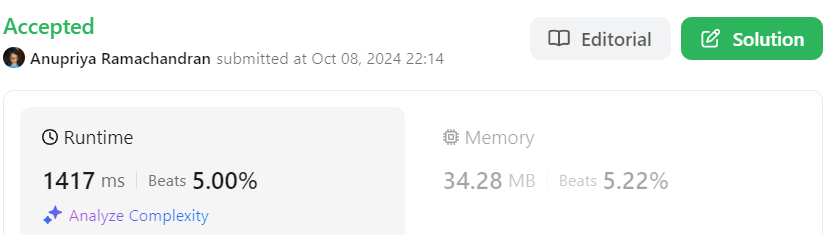
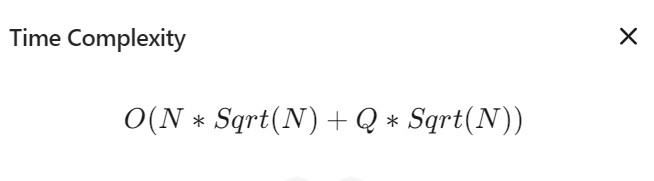

In [1]:
import math
from typing import List

class Query:
    def __init__(self, left, right, index):
        self.left = left
        self.right = right
        self.index = index

class Solution:
    def xorQueries(self, arr: List[int], queries: List[List[int]]) -> List[int]:
        n = len(arr)
        q = len(queries)

        blocksize = math.ceil(math.sqrt(n))
        answer = [0]*q

        queries = [Query(query[0],query[1], i)  for i, query in enumerate(queries)]
        queries.sort(key = lambda q:(q.left//blocksize, q.right))

        currentleft, currentright = 0, -1
        currentxor = 0 

        for  query in queries:
            left = query.left
            right = query.right


            while currentright < right:
                currentright += 1
                currentxor ^= arr[currentright]

            while currentright > right:
                currentxor ^= arr[currentright]
                currentright -= 1

            while currentleft > left:
                currentleft -= 1
                currentxor ^= arr[currentleft]
                

            while currentleft < left:
                currentxor ^= arr[currentleft]
                currentleft += 1
                
            answer[query.index] = currentxor
        return answer

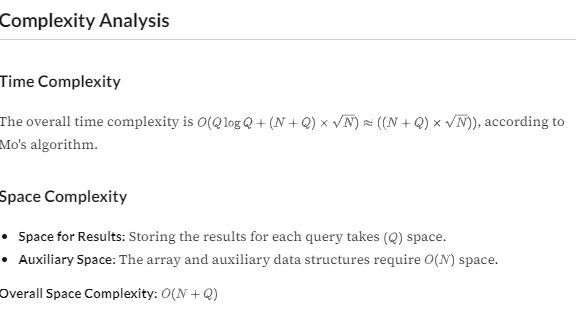

## Using Prefix Sum
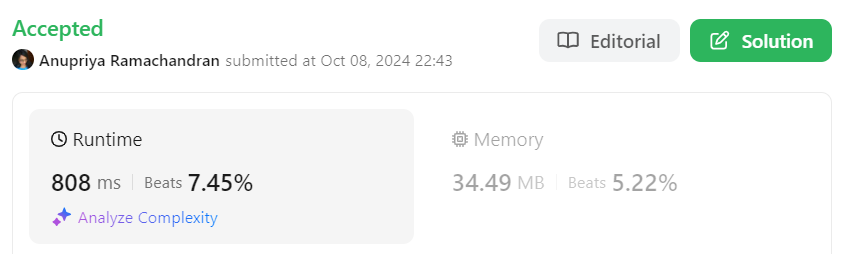

In [2]:
import math
class Solution:
    def xorQueries(self, arr: List[int], queries: List[List[int]]) -> List[int]:
        n = len(arr)
        
        prefix_xor = [0]* n
        prefix_xor[0] = arr[0]
        for i in range(1, n ):
            prefix_xor[i] = prefix_xor[i-1] ^ arr[i]

        result = []
        for left, right in queries:
            if left == 0:
                result.append(prefix_xor[right])
            else:
                result.append(prefix_xor[right] ^ prefix_xor[left - 1])

        return result